## Importing Packages

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Importing Data

In [102]:
original_data = pd.read_csv('C:/Users/adity/Downloads/EOD-AAPL.csv')
original_data

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,171.00,171.850,170.480,171.080,16480187.0,0.0,1.0,41.136972,41.341454,41.011877,41.156217,65920748.0
1,2017-12-27,170.10,170.780,169.710,170.600,21498213.0,0.0,1.0,40.920461,41.084047,40.826640,41.040745,85992852.0
2,2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0
3,2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
4,2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0
1086,2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
1087,2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
1088,2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0


## Creating copy of original data

In [103]:
data = original_data.copy()

## Exploring the data

In [104]:
# Stock Split
(data['Split']==7.0).value_counts()

False    1089
True        1
Name: Split, dtype: int64

In [105]:
# Stock Dividend
(data['Dividend']<3.29).value_counts()

True     1089
False       1
Name: Dividend, dtype: int64

In [106]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1090 non-null   object 
 1   Open        1090 non-null   float64
 2   High        1090 non-null   float64
 3   Low         1090 non-null   float64
 4   Close       1090 non-null   float64
 5   Volume      1090 non-null   float64
 6   Dividend    1090 non-null   float64
 7   Split       1090 non-null   float64
 8   Adj_Open    1090 non-null   float64
 9   Adj_High    1090 non-null   float64
 10  Adj_Low     1090 non-null   float64
 11  Adj_Close   1090 non-null   float64
 12  Adj_Volume  1090 non-null   float64
dtypes: float64(12), object(1)
memory usage: 110.8+ KB


In [108]:
data.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

In [109]:
data.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,194.564537,196.114735,193.016676,194.613130,3.605114e+07,0.015642,1.005505,26.367551,26.578236,26.152043,26.373196,1.931334e+08
std,160.562848,161.812898,159.407381,160.647536,2.194473e+07,0.175122,0.181735,6.614490,6.640870,6.578682,6.616455,1.112891e+08
min,90.000000,90.700000,89.470000,90.280000,5.704900e+06,0.000000,1.000000,14.189776,14.561974,14.166335,14.258197,4.590369e+07
25%,108.042500,108.942500,106.972500,108.007500,2.120714e+07,0.000000,1.000000,22.170235,22.433992,21.948836,22.201030,1.133450e+08
50%,121.585000,122.504950,120.640000,121.755000,3.248325e+07,0.000000,1.000000,25.781510,26.055842,25.511496,25.789823,1.681963e+08
75%,156.905000,157.809625,155.744975,156.515000,4.673778e+07,0.000000,1.000000,29.329099,29.541994,29.133958,29.362853,2.394642e+08
max,649.900000,651.260000,644.470000,647.350000,1.895606e+08,3.290000,7.000000,42.125703,42.628488,42.065561,42.440845,1.065523e+09


## Feature Engineering

#### Generating new features from existing features

In [110]:
data['HL_PCT'] = (data['Adj_High'] - data['Adj_Low'])/(data['Adj_Close']*100)
data['PCT_change'] = (data['Adj_Close'] - data['Adj_Open'])/(data['Adj_Open']*100)

In [111]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
0,2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.136972,41.341454,41.011877,41.156217,65920748.0,0.000080,0.000005
1,2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.920461,41.084047,40.826640,41.040745,85992852.0,0.000063,0.000029
2,2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0,0.000105,-0.000013
3,2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0,0.000053,0.000019
4,2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0,0.000110,0.000048


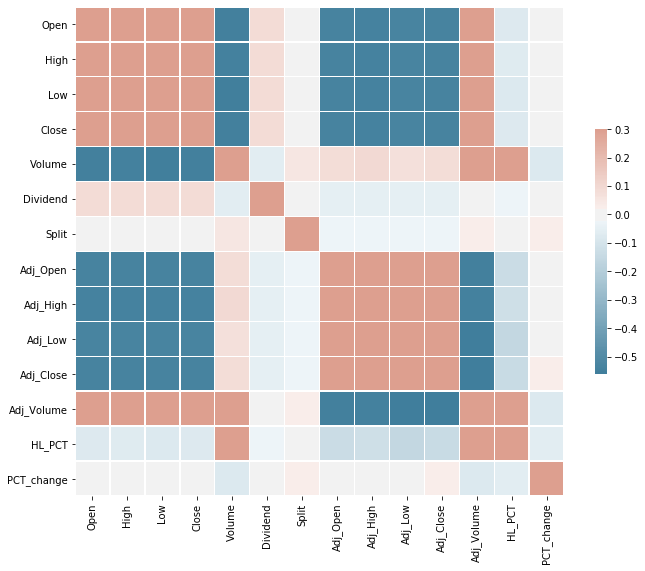

In [112]:
corr = data.corr()

f,ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Feature Selection

In [113]:
data = data[['Adj_Close', 'Adj_Volume', 'HL_PCT', 'PCT_change']]

In [114]:
data.shape

(1090, 4)

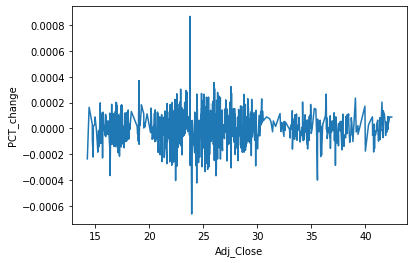

In [115]:
sns.lineplot(x="Adj_Close", y="PCT_change",data=data)

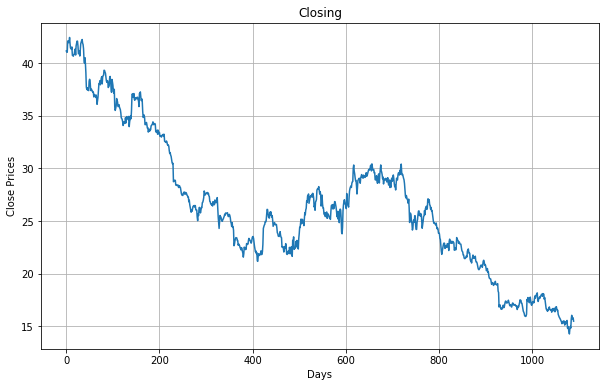

In [116]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(data['Adj_Close'])

plt.xlabel('Days')
plt.ylabel('Close Prices')
plt.title('Closing')
plt.show()

In [117]:
data.corr()

,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Adj_Close,1.000000,-0.553474,-0.137288,0.025237
Adj_Volume,-0.553474,1.000000,0.512480,-0.079556
HL_PCT,-0.137288,0.512480,1.000000,-0.060349
PCT_change,0.025237,-0.079556,-0.060349,1.000000


## Preparing Input Output features for Model Training

In [118]:
data = data[['Adj_Close', 'Adj_Volume', 'HL_PCT', 'PCT_change']]
data

,Adj_Close,Adj_Volume,HL_PCT,PCT_change
0,41.156217,65920748.0,0.000080,0.000005
1,41.040745,85992852.0,0.000063,0.000029
2,41.033528,132742144.0,0.000105,-0.000013
3,42.101646,65397776.0,0.000053,0.000019
4,42.101646,83799584.0,0.000110,0.000048
...,...,...,...,...
1085,16.033661,340687200.0,0.000088,0.000023
1086,15.781833,359525600.0,0.000189,-0.000004
1087,15.688388,236367600.0,0.000142,-0.000100
1088,15.796753,345032800.0,0.000120,-0.000017


In [119]:
# Create a variable to predict 'x' days out into the future
future_days = 25

# Create anew column (target) shifted 'x' units/days up
data['Prediction'] = data[['Adj_Close']].shift(-future_days)
data.head()

,Adj_Close,Adj_Volume,HL_PCT,PCT_change,Prediction
0,41.156217,65920748.0,0.000080,0.000005,41.651785
1,41.040745,85992852.0,0.000063,0.000029,40.891593
2,41.033528,132742144.0,0.000105,-0.000013,40.932490
3,42.101646,65397776.0,0.000053,0.000019,41.161029
4,42.101646,83799584.0,0.000110,0.000048,40.675083


In [120]:
data.tail()

,Adj_Close,Adj_Volume,HL_PCT,PCT_change,Prediction
1085,16.033661,340687200.0,0.000088,0.000023,NaN
1086,15.781833,359525600.0,0.000189,-0.000004,NaN
1087,15.688388,236367600.0,0.000142,-0.000100,NaN
1088,15.796753,345032800.0,0.000120,-0.000017,NaN
1089,15.476472,331928800.0,0.000271,-0.000092,NaN


In [121]:
# Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(data.drop(['Prediction'],1))[: -future_days]
print(X)

[[ 4.11562172e+01  6.59207480e+07  8.00794950e-05  4.67836257e-06]
 [ 4.10407450e+01  8.59928520e+07  6.27198124e-05  2.93944738e-05]
 [ 4.10335280e+01  1.32742144e+08  1.05000879e-04 -1.34660422e-05]
 ...
 [ 1.55099861e+01  2.78602800e+08  1.09060163e-04 -3.42343076e-05]
 [ 1.54133730e+01  3.01725200e+08  1.95442551e-04  4.01947838e-05]
 [ 1.52344645e+01  2.90917200e+08  2.10005406e-04 -1.83695963e-04]]


In [122]:
X.shape

(1065, 4)

In [123]:
# Create the target data set (y) and convert it to numpy array and get all of the target values except the last 'x' rows/days
y = np.array(data['Prediction'])[:-future_days]
print(y)

[41.65178543 40.89159344 40.93248984 ... 15.68838781 15.79675289
 15.47647246]


In [124]:
y.shape

(1065,)

In [125]:
# Get the last 'x' rows of the feature data set
x_future = data.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[ 1.65378560e+01,  2.27452400e+08,  1.39871457e-04,
        -1.81157330e-05],
       [ 1.65860312e+01,  2.79316800e+08,  1.64054096e-04,
         1.16211279e-04],
       [ 1.63289694e+01,  2.62620400e+08,  2.10930122e-04,
        -1.36417876e-04],
       [ 1.65975015e+01,  2.23375600e+08,  1.27850726e-04,
        -6.16235810e-05],
       [ 1.66443509e+01,  2.65213200e+08,  1.11999452e-04,
         1.65656335e-05],
       [ 1.66855620e+01,  2.44627600e+08,  1.52064547e-04,
         1.08424487e-04],
       [ 1.64726963e+01,  2.74890000e+08,  1.72297752e-04,
        -7.61421320e-05],
       [ 1.65573358e+01,  2.75696400e+08,  1.18997058e-04,
        -4.37714286e-05],
       [ 1.66268339e+01,  3.54163600e+08,  2.00039627e-04,
         1.01730144e-04],
       [ 1.63665169e+01,  6.35807200e+08,  4.78247574e-04,
        -3.65338356e-04],
       [ 1.67845825e+01,  5.50440800e+08,  1.47015528e-04,
         1.58022078e-05],
       [ 1.66604742e+01,  3.37792000e+08,  1.54384951e-04,
      

In [126]:
x_future.shape

(25, 4)

In [127]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

### Building Model

In [128]:
# Create the model
lr = LinearRegression().fit(x_train, y_train)

In [130]:
# Predict the result that will contain forecasted data
forecast = []
forecast = lr.predict(x_future)
y_pred = lr.predict(x_test)

In [133]:
# Mean squared error and Root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse, rmse)

2.8813485453413636 1.697453547329459


In [134]:
# R squared value
r2_test = lr.score(x_test,y_test)
r2_train = lr.score(x_train,y_train)
print(r2_test, r2_train)

0.9333800901219079 0.9242644539589739


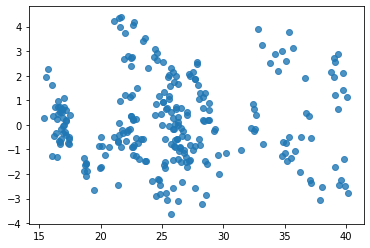

In [143]:
# Regression diagnostics - Residual plot analysis
residuals = y_test - y_pred
sns.regplot(x=y_pred, y=residuals, scatter=True, fit_reg=False)